In [4]:
import numpy as np
import matplotlib.pyplot as plt
from wav_mixed.old_dani import twod_dani_old as w2d
import matplotlib as mpl
import matplotlib.pyplot as plt
from utils import u_arrays as ua
from scipy import ndimage
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = (16., 9.)
%matplotlib inline


In [2]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


Create homogeneous circle with sharp edges and bell-shaped curve to compare wavelet analysis on those shapes

In [5]:
ellipse = np.zeros((300,300))
short =17
xcirc, ycirc = ua.draw_circle(150,150,short)
ellipse[ycirc,xcirc] = -1    #  full shape is -1

res = 5
mother2d = w2d.Mexican_hat()

In [6]:
x1 = np.arange(300)
y1 = np.arange(300)
x,y = np.meshgrid(x1,y1)
bell = np.exp(-( (x-150)**2/100. + (y-150)**2/3600. ))* -1   # minimum is -1

In [7]:
wavel_circ, scales_circ, freqs_circ = w2d.cwt2d(ellipse, res, res, dj=0.09, s0=5, J=55)
wavel_bell, scales_bell, freqs_bell = w2d.cwt2d(bell, res, res, dj=0.09, s0=5, J=55)

def calc(wavel_in, scales_in, freq_in):
    wavel = wavel_in.copy()
    wavel[np.real(wavel>=0)] = 0 
    power = (np.abs(wavel)) **2
    period = 1. / freq_in
    scales = scales_in.copy()
    scales.shape = (len(scales),1,1)
    power_norm = power / (scales**2)
    real_scales = period / 2. #(period/3.) * 2 #
    
    return wavel, power_norm, period, real_scales

wavel_circ_pos, power_circ, period_circ, scale_circ = calc(wavel_circ, scales_circ, freqs_circ)
wavel_bell_pos, power_bell, period_bell, scale_bell = calc(wavel_bell, scales_bell, freqs_bell)


Old s0 5
Old s0 5


In [8]:
print(scale_circ)
print(scale_bell)

[  9.93458827  10.57407953  11.25473495  11.9792043   12.75030786
  13.57104751  14.44461831  15.37442103  16.36407531  17.41743383
  18.53859722  19.7319301   21.00207804  22.35398564  23.79291577
  25.3244701   26.95461087  28.68968408  30.53644428  32.50208077
  34.59424564  36.82108355  39.19126341  41.71401219  44.39915077
  47.2571322   50.29908242  53.53684354  56.98301992  60.65102731
  64.55514501  68.71057147  73.13348349  77.84109917  82.85174492
  88.18492686  93.86140669  99.90328256 106.33407509 113.1788189
 120.46416013 128.21846009 136.47190576 145.25662724 154.60682284
 164.55889223 175.15157815 186.42611719 198.42640037 211.19914396
 224.79407139 239.26410678 254.66558099 271.0584509  288.50653284
 307.077751  ]
[  9.93458827  10.57407953  11.25473495  11.9792043   12.75030786
  13.57104751  14.44461831  15.37442103  16.36407531  17.41743383
  18.53859722  19.7319301   21.00207804  22.35398564  23.79291577
  25.3244701   26.95461087  28.68968408  30.53644428  32.50208

In [9]:
def calc_max_2d(power):
    wll = power
    maxs = np.zeros_like(wll)
    yl = []
    xl = []
    zl = []
    for nb in range(power.shape[0]):

        wll = power
        wl = power[nb, :, :]

        maxout = (
            wl == ndimage.maximum_filter(wl, (5, 5), mode='constant', cval=np.amax(wl) + 1))  # (np.round(orig / 5))

        try:
            yy, xx = np.where((maxout == 1))
        except IndexError:
            continue

        for y, x in zip(yy, xx):
            #print(arr[nb],y,x)

            maxs[nb,y,x] = 1
            #print('Power value',wll[nb,y,x])
            yl.append(y)
            xl.append(x)
            zl.append(nb)
    print('finish loop')
    
    return zl, yl, xl, maxs

z_circ, y_circ, x_circ, max_circ = calc_max_2d(power_circ)
z_bell, y_bell, x_bell, max_bell = calc_max_2d(power_bell)

finish loop
finish loop


In [10]:
def calc_max_3d(power):
    wll = power 
    maxout2 = (
        wll == ndimage.maximum_filter(wll, (5, 5,5), mode='reflect', cval=np.amax(wl) + 1))  # (np.round(orig / 5))
    zl, yl, xl = np.where((maxout2==1))  #  & (wll > arr.repeat(300*300,axis=0).reshape((nb+1,300,300)) ** .5)
    

Circ power max 0.5408368692436698
Bell power max 0.16344783946608696
0.5408368692436698
0.16344783946608696
Max scale circ 120.46416012741561
Max scale bell 99.90328256378652
35
31


/home/ck/miniconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


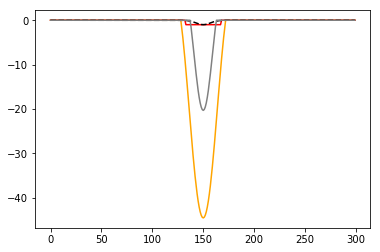

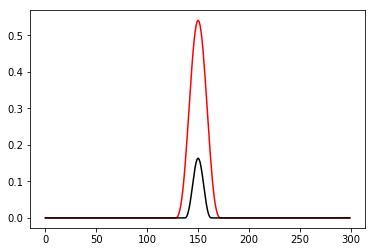

In [11]:
print('Circ power max', power_circ.max())
print('Bell power max', power_bell.max())
print(np.max(power_circ[:,150,150]))
print(np.max(power_bell[:,150,150]))

maxpos_circ = np.argmax(power_circ[:,150,150])
maxpos_bell = np.argmax(power_bell[:,150,150])
print('Max scale circ', scale_circ[maxpos_circ])
print('Max scale bell', scale_bell[maxpos_bell])

plt.figure()
plt.plot(wavel_circ_pos[maxpos_circ,150,:], color='orange')
plt.plot(ellipse[150,:], color='r')
plt.plot(bell[150,:], linestyle='--', color='k')
plt.plot(wavel_bell_pos[maxpos_bell,150,:], color='grey')

plt.figure()
plt.plot(power_circ[maxpos_circ,150,:], 'r')
plt.plot(power_bell[maxpos_bell,150,:], 'k')

print(np.sum(ellipse[150,:]<0))
print(np.sum(bell[150,:]<-0.1))

In [12]:
def doPrints(power, scale, zl, yl, xl, maxs, res=res, short=short):
    wlmax = np.max(power[zl,yl,xl])
    pl = np.where(power == wlmax)

    zll, yll, xll = np.where((maxs == 1))
    wllmax = np.max(power[zll,yll,xll])
    pll = np.where(power == wllmax)
    #print('Available scales', scale)
    print('Max point scales: ', scale[zl])

    amax = np.unravel_index(np.argmax(power), power.shape)
    print('Totalmax whole domain', scale[amax[0]])
    print('Totalmax 3d', scale[pl[0]])
    print('Totalmax 2d', scale[pll[0]])
    print('Scale of perfect circle', (2*short+1)*res)
    print('Pixel-adjusted perfect circle', (2 *short + 1 -2) *res)
    print('Max scale in pixelacross', scale[amax[0]]/res)
    print('Power max', np.max(power))
    print(amax[0])
    print('Scale', scale[amax[0]])
    
doPrints(power_circ, scale_circ, z_circ, y_circ, x_circ, max_circ, res=res, short=short)    
doPrints(power_bell, scale_bell, z_bell, y_bell, x_bell, max_bell, res=res, short=short)    

Max point scales:  [  9.93458827   9.93458827   9.93458827 ... 307.077751   307.077751
 307.077751  ]
Totalmax whole domain 120.46416012741561
Totalmax 3d [120.46416013]
Totalmax 2d [120.46416013]
Scale of perfect circle 175
Pixel-adjusted perfect circle 165
Max scale in pixelacross 24.092832025483123
Power max 0.5408368692436698
40
Scale 120.46416012741561
Max point scales:  [  9.93458827   9.93458827   9.93458827 ... 307.077751   307.077751
 307.077751  ]
Totalmax whole domain 99.90328256378652
Totalmax 3d [99.90328256]
Totalmax 2d [99.90328256]
Scale of perfect circle 175
Pixel-adjusted perfect circle 165
Max scale in pixelacross 19.980656512757303
Power max 0.16344783946608696
37
Scale 99.90328256378652


The result shows that period/2 returns a smaller 'discrete' scale than the actual discrete circle encompasses i.e. the true scale is underestimated for discrete features. 2/3 * period might be a more 'realistic' representation of discrete feature scales but period/2 might better represent the 'effective' scale i.e. not counting the low-value edges of features into the scale attribution. There is no simple objective way of doing/deciding this.